In [39]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import roc_auc_score 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X = pd.read_csv('/Users/ericdrake/Desktop/Class-Work-/projects/final-projects/train.csv')
Y = X.pop('Survived')

In [6]:
X.describe()

/Users/ericdrake/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#average age
avgAge = X.Age.mean()
#for every missing value for age, input the variable assignment for the average age 
X.Age = X.Age.fillna(value = avgAge)

In [10]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Want to try to get just the numeric variables that are not object data types. 
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [18]:
#I'm building the first model and going with 100 estimators because this is a small dataset.
#We set the out of bage prediction to true, and the random state to 42 to randomize the data set. 
model = RandomForestRegressor(n_estimators = 100, oob_score=True,random_state=42)
#I only use the numeric variables because I have yet to create dummies for the categorical variables. 
#Trained the data set. 
model.fit(X[numeric_variables], Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [20]:
#gives us the r-squared value but we want the c-stat. 
model.oob_score_

0.1361695005913669

In [22]:
#We ran c- stat and now have a benchmark. I feel like it could be better, 
Y_oob = model.oob_prediction_
print 'c-stat: ', roc_auc_score(Y, Y_oob)

c-stat:  0.73995515504


In [24]:
#This is a function to get the descriptive stats for the categorical variables. 
def describe_categorical(X):
    from IPython.display import display, HTML 
    display(HTML(X[X.columns[X.dtypes=='object']].describe().to_html()))
    #This is just like .describe, but it returns the categorical variables only. 

In [25]:
describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [26]:
#Drop some of the variables that are not as important 
X.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [29]:
#Function that changed the cabin variable to be only the first letter or "none"
def clean_cabin(X):
    try:
        return X[0]
    except TypeError:
        return "None"
    
X["Cabin"] = X.Cabin.apply(clean_cabin)

In [31]:
#Fill the missing variables with 'Missing'
#Create an array of dummy variables
#update X to include dummies and drop the main variable 
categorical_variables = ['Sex', 'Embarked', 'Cabin']

for variable in categorical_variables:
    X[variable].fillna('Missing', inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [32]:
#New dataset that has categorical variables included and the missing observations accounted for. 
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,38.000000,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,3,29.699118,0,0,8.4583,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,54.000000,0,0,51.8625,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,3,2.000000,3,1,21.0750,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,3,27.000000,0,2,11.1333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2,14.000000,1,0,30.0708,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
#RandomForestRegressor with 100 trees with out of bag scores being calculated throughout it
#using all the processors and having the random state at 42 
model = RandomForestRegressor (100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, Y)
print 'c-stat: ', roc_auc_score(Y,model.oob_prediction_ )

c-stat:  0.862482557334


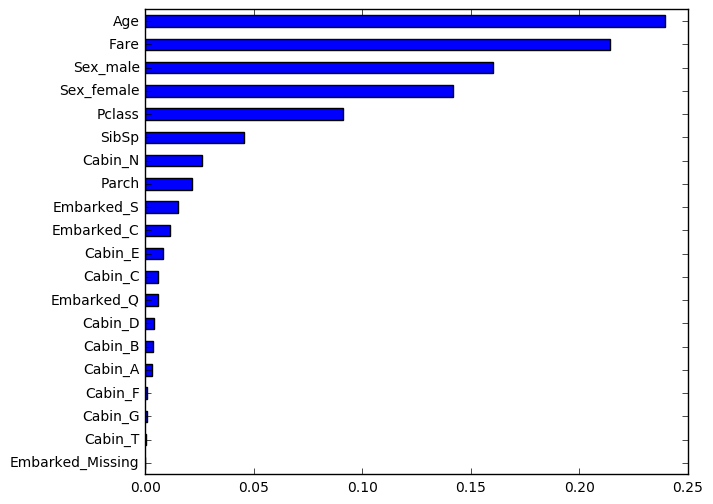

In [40]:
#This is a good model thus far but I will now use a couple of other parameters to try and gain more insight into the dataset. 
#I will first use it to see what variables are important in the model. 
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6))

In [ ]:
#This is a good way to get a better sense of what variables truly matter to us. As predicted, Sex, Fare, and Age are our most important predictors. 
#Lets optimize the parameters now. 
#max_feature, n_estimators, and min_sample leaf will help make our model better. 
 

In [45]:
#n-estimator function
#iterate through every number we have in the estimator options and run the c-stat/roc score for each estimator
results= []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, Y)
    print trees, "trees"
    roc = roc_auc_score(Y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
    

30 trees
C-stat:  0.856576018066

50 trees
C-stat:  0.861337466313

100 trees
C-stat:  0.862482557334

200 trees
C-stat:  0.862597066437

500 trees
C-stat:  0.863550421287

1000 trees
C-stat:  0.863891285591

2000 trees
C-stat:  0.86327346904



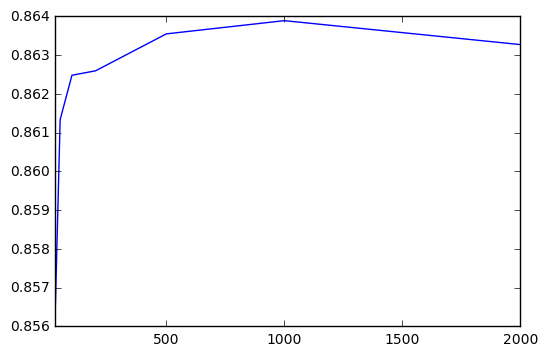

In [48]:
pd.Series(results, n_estimator_options).plot();
#Very accurate model 

In [50]:
#Max features = The number of variables it considers at each split. 

results= []
max_features_options = ['auto', None, 'sqrt', 'log2', 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features = max_features)
    model.fit(X, Y)
    print max_features, "option"
    roc = roc_auc_score(Y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    

auto option
C-stat:  0.863891285591

None option
C-stat:  0.863891285591

sqrt option
C-stat:  0.863981827672

log2 option
C-stat:  0.863981827672

0.9 option
C-stat:  0.864269431928

0.2 option
C-stat:  0.863981827672



In [58]:
#min_sample 
#This function will split the leaf 

results = []
min_samples_leaf_options= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000,
                              oob_score=True,
                              n_jobs=-1, 
                              random_state=42,
                              max_features='auto',
                             min_samples_leaf=min_samples)
    model.fit(X, Y)
    print min_samples, 'min_samples'
    roc = roc_auc_score(Y, model.oob_prediction_)
    print "c-stat:", roc 
    results.append(roc)
    print ""

1 min_samples
c-stat: 0.863891285591

2 min_samples
c-stat: 0.869704619777

3 min_samples
c-stat: 0.871411604299

4 min_samples
c-stat: 0.873254401943

5 min_samples
c-stat: 0.874253027834

6 min_samples
c-stat: 0.874141181734

7 min_samples
c-stat: 0.873289020974

8 min_samples
c-stat: 0.871957519786

9 min_samples
c-stat: 0.869347777458

10 min_samples
c-stat: 0.867441067757



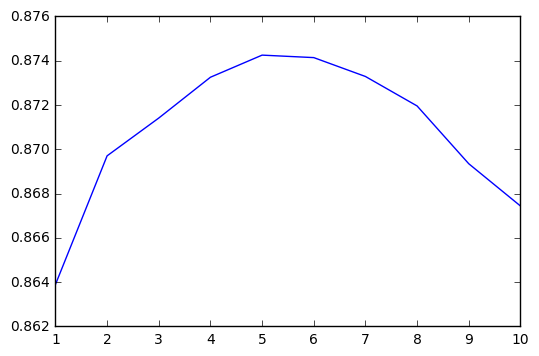

In [59]:
pd.Series(results, min_samples_leaf_options).plot();

In [53]:
#Final Model
#FInally, after seeing that 1000 estimators returned the best model, plus max features on auto or none 
#and the minimum sample leaf spliting after 5, this is the most optimized model we will get. We also have a great picture for which variables matter as well. 
#I was unable to do the markdowns and fully explain why I used these parameters but I hope that the idea is somewhat clear. 
model = RandomForestRegressor(n_estimators=1000,
                              oob_score=True,
                              n_jobs=-1, 
                              random_state=42,
                              max_features='auto',
                             min_samples_leaf=5)
model.fit(X, Y)
roc = roc_auc_score(Y, model.oob_prediction_)
print "c-stat:", roc 

c-stat: 0.874253027834
